# Algorithmic Trading Internship Assignment

## Objective: To analyze financial data, develop predictive models, and implement algorithmic trading strategies.

#  Task 1: Data Analysis and Feature Engineering


## Installing Required Packages

In [5]:
!pip install backtrader
!pip install ipython
!pip install --upgrade jupyter ipython

## Importing Essential Libraries

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Step 1: Load Dataset

In [9]:
data = pd.read_csv('ALB.csv', parse_dates=['Date'], index_col='Date')
data.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-02-22 00:00:00-05:00,4.555785,4.555785,4.478568,4.478568,20800,0.0,0.0
1994-02-23 00:00:00-05:00,4.401352,4.401352,4.169702,4.285527,31600,0.0,0.0
1994-02-24 00:00:00-05:00,4.285526,4.285526,4.208310,4.208310,32000,0.0,0.0
1994-02-25 00:00:00-05:00,4.131093,4.131093,3.860835,3.976660,49800,0.0,0.0


In [10]:
### Checking its info 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7448 entries, 1994-02-22 00:00:00-05:00 to 2023-09-21 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7448 non-null   float64
 1   High          7448 non-null   float64
 2   Low           7448 non-null   float64
 3   Close         7448 non-null   float64
 4   Volume        7448 non-null   int64  
 5   Dividends     7448 non-null   float64
 6   Stock Splits  7448 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 465.5+ KB


In [12]:
### Checking it's statistics 

In [13]:
data.describe

<bound method NDFrame.describe of                                  Open        High         Low       Close  \
Date                                                                        
1994-02-22 00:00:00-05:00    4.555785    4.555785    4.478568    4.478568   
1994-02-23 00:00:00-05:00    4.401352    4.401352    4.169702    4.285527   
1994-02-24 00:00:00-05:00    4.285526    4.285526    4.208310    4.208310   
1994-02-25 00:00:00-05:00    4.131093    4.131093    3.860835    3.976660   
1994-02-28 00:00:00-05:00    4.015270    4.169704    3.976662    4.092487   
...                               ...         ...         ...         ...   
2023-09-15 00:00:00-04:00  184.330002  188.470001  182.929993  183.839996   
2023-09-18 00:00:00-04:00  183.380005  183.500000  179.470001  181.619995   
2023-09-19 00:00:00-04:00  181.300003  182.250000  178.410004  179.990005   
2023-09-20 00:00:00-04:00  180.089996  181.479996  174.210007  174.440002   
2023-09-21 00:00:00-04:00  172.500000  172

In [14]:
### Checking its shape 

In [15]:
data.shape

(7448, 7)

### Handeling missing data

In [17]:
data=data.dropna()

In [18]:
data.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-02-22 00:00:00-05:00,4.555785,4.555785,4.478568,4.478568,20800,0.0,0.0
1994-02-23 00:00:00-05:00,4.401352,4.401352,4.169702,4.285527,31600,0.0,0.0
1994-02-24 00:00:00-05:00,4.285526,4.285526,4.208310,4.208310,32000,0.0,0.0
1994-02-25 00:00:00-05:00,4.131093,4.131093,3.860835,3.976660,49800,0.0,0.0


In [19]:
### Checking different column names. 

In [20]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

### Computing Daily Returns

In [22]:
data['Return']=data['Close'].pct_change()
data.dropna(inplace=True)

### Step 2: Feature Engineering

### Technical Indicators Calculation

In [25]:
### Some technical words used 
''' Simple Moving Averages (SMA):
SMA_10: 10-day moving average of the closing price.
SMA_50: 50-day moving average.

Relative Strength Index (RSI):
RSI above 70 → Overbought
RSI below 30 → Oversold

MACD (Moving Average Convergence Divergence):
Difference between 12-day EMA & 26-day EMA.

Volatility: Measures risk using standard deviation of returns over 10 days.

Momentum: Difference in closing price over the past 10 days.

'''

' Simple Moving Averages (SMA):\nSMA_10: 10-day moving average of the closing price.\nSMA_50: 50-day moving average.\n\nRelative Strength Index (RSI):\nRSI above 70 → Overbought\nRSI below 30 → Oversold\n\nMACD (Moving Average Convergence Divergence):\nDifference between 12-day EMA & 26-day EMA.\n\nVolatility: Measures risk using standard deviation of returns over 10 days.\n\nMomentum: Difference in closing price over the past 10 days.\n\n'

In [26]:
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['RSI'] = 100 - (100 / (1 + data['Return'].rolling(14).mean() / data['Return'].rolling(14).std()))
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Volatility'] = data['Return'].rolling(window=10).std()
data['Momentum'] = data['Close'].diff(10)
data.dropna(inplace=True)

In [27]:
 # Check if there are extreme or missing values

In [28]:
print(data[['Return']].head(20))

                             Return
Date                               
1994-05-05 00:00:00-04:00 -0.008547
1994-05-06 00:00:00-04:00  0.000000
1994-05-09 00:00:00-04:00  0.000000
1994-05-10 00:00:00-04:00  0.034483
1994-05-11 00:00:00-04:00  0.008333
1994-05-12 00:00:00-04:00  0.024793
1994-05-13 00:00:00-04:00 -0.048387
1994-05-16 00:00:00-04:00  0.008475
1994-05-17 00:00:00-04:00  0.008403
1994-05-18 00:00:00-04:00  0.000000
1994-05-19 00:00:00-04:00  0.008333
1994-05-20 00:00:00-04:00 -0.024794
1994-05-23 00:00:00-04:00 -0.016949
1994-05-24 00:00:00-04:00  0.043104
1994-05-25 00:00:00-04:00  0.016529
1994-05-26 00:00:00-04:00  0.008130
1994-05-27 00:00:00-04:00  0.008064
1994-05-31 00:00:00-04:00  0.032000
1994-06-01 00:00:00-04:00 -0.023256
1994-06-02 00:00:00-04:00  0.000000


### Step 3: Data Visualization

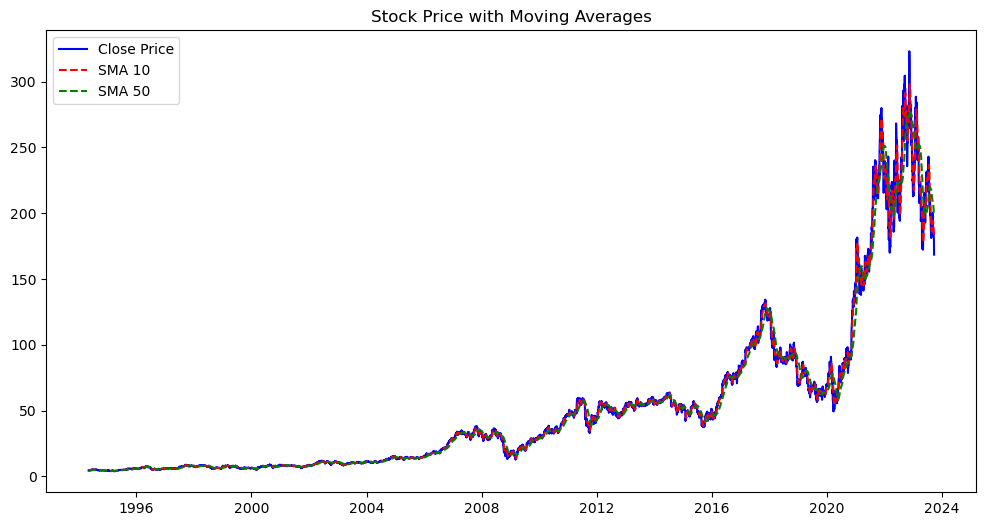

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_10'], label='SMA 10', color='red', linestyle='dashed')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='green', linestyle='dashed')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()

## Task 2 : Model Building 

### Step 1: Creating Labels for Prediction


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Preparing Data 

In [57]:
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)
features = ['SMA_10', 'SMA_50', 'RSI', 'MACD', 'Volatility', 'Momentum']
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 2: Training the model

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Step 3: Evaluating Model Performance

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5094594594594595
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       746
           1       0.51      0.51      0.51       734

    accuracy                           0.51      1480
   macro avg       0.51      0.51      0.51      1480
weighted avg       0.51      0.51      0.51      1480



## Task 3: Backtesting a Simple Trading Strategy


### Step 1: Implementing the Trading Strategy with Stop-Loss and Take-Profit


In [74]:
def backtest_strategy(data, stop_loss=0.02, take_profit=0.04):
    capital = 10000  
    position = 0  
    entry_price = 0  

    for i in range(1, len(data)):
        if position == 0:
            if data['Return'].iloc[i] > 0:  
                position = capital / data['Close'].iloc[i]
                entry_price = data['Close'].iloc[i]
                capital = 0
        else:
            if data['Close'].iloc[i] <= entry_price * (1 - stop_loss):
                capital = position * data['Close'].iloc[i]  
                position = 0
            elif data['Close'].iloc[i] >= entry_price * (1 + take_profit):
                capital = position * data['Close'].iloc[i]  
                position = 0
    return capital if position == 0 else position * data['Close'].iloc[-1]

final_capital = backtest_strategy(data)
print(f"Final Capital after Backtest: ${final_capital:.2f}")

Final Capital after Backtest: $62000.67



## Task 4: Optimization & Refinement


### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)